In [176]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MESS
from IPython.display import display


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
com = [1, 1, 1, 1, 1, 3000]
#com = [100, 100, 100, 100, 100, 300]

#MESS.stats.hill_numbers(abunds=com, orders=5)
hs = np.array([MESS.stats.generalized_hill_number(abunds=com, order=x) for x in range(0,6)])
np.log(hs)/np.log(6)

array([1.        , 0.00836442, 0.00185851, 0.00139412, 0.00123921,
       0.00116176])

In [15]:
np.log(0)

/home/isaac/miniconda2/envs/MESS/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

Removed invariant targets. Retained: ['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4', 'SGD_5', 'SGD_6', 'SGD_7', 'SGD_8', 'SGD_9', 'abundance_pi_cor', 'trait_h1', 'trait_h2', 'trait_h3', 'trait_h4', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'mean_regional_traits', 'std_regional_traits', 'skewness_regional_traits', 'kurtosis_regional_traits', 'median_regional_traits', 'iqr_regional_traits', 'reg_loc_mean_trait_dif', 'reg_loc_std_trait_dif', 'reg_loc_skewness_trait_dif', 'reg_loc_kurtosis_trait_dif', 'reg_loc_median_trait_dif', 'reg_loc_iqr_trait_dif', 'abundance_trait_cor', 'pi_trait_cor']
Nsims
  neutral	354
  filtering	352
  competition	294


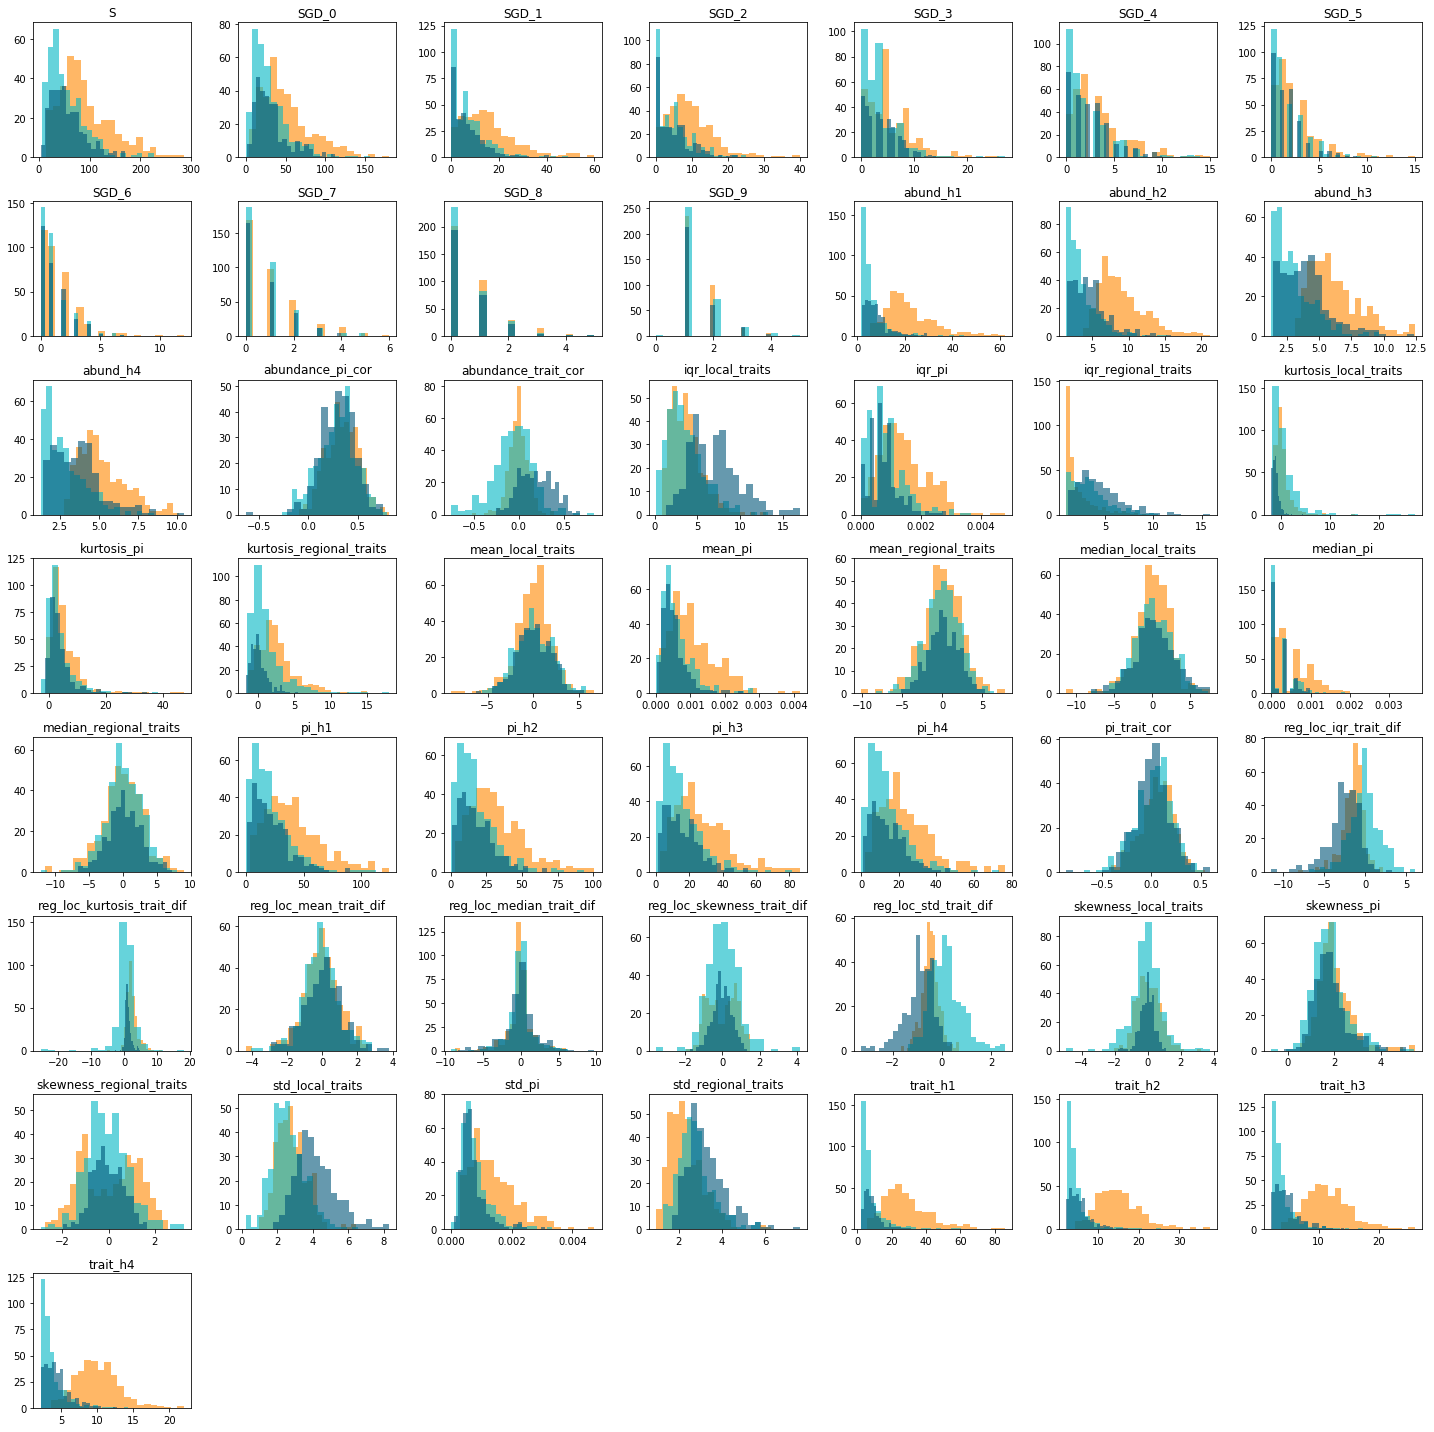

In [78]:
simfile = "/home/isaac/Continuosity/MESS/analysis/figure5-sims/SIMOUT.txt"
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=True,\
                                        figsize=(20, 20), select=0.75, tol=.1,\
                                        feature_set=MESS.stats.feature_sets()["abundance+pi+trait"])


In [201]:
df = MESS.plotting._filter_sims(simfile, feature_set=MESS.stats.feature_sets()["abundance+pi+trait"],
                               select=0.75, tol=.1, normalize_hills=True)[1]
for y in [x for x in df.columns if "_h" in x]:
    print(y, np.any(df[y] == 0), end=", ")

abund_h1 False, abund_h2 False, abund_h3 False, abund_h4 False, pi_h1 True, pi_h2 True, pi_h3 True, pi_h4 True, trait_h1 False, trait_h2 False, trait_h3 False, trait_h4 False, 

In [177]:
tmp_df = pd.DataFrame()
with np.errstate(divide='raise'):
    try:
        tmp_df =\
            df[[x for x in df.columns if "_h" in x]]\
            .apply(lambda x: np.log(x)/np.log(df["S"]))
        display(tmp_df)
    except FloatingPointError:
        print("wat")
        for y in [x for x in df.columns if "_h" in x]:
            print(y, np.any(df[y] < 0), end=", ")


wat
abund_h1 False, abund_h2 False, abund_h3 False, abund_h4 False, pi_h1 False, pi_h2 False, pi_h3 False, pi_h4 False, trait_h1 False, trait_h2 False, trait_h3 False, trait_h4 False, 

In [181]:
from numpy import inf
#df[df[np.isneginf(df)]] = 0
df = np.ma.log(df)
df.filled(0)

TypeError: loop of ufunc does not support argument 0 of type BlockManager which has no callable log method

In [202]:
h_df = pd.DataFrame(np.ma.log(df[[x for x in df.columns if "_h" in x]].values).filled(0),\
                    columns=[x for x in df.columns if "_h" in x], index=df.index)
df.update(h_df.apply(lambda x: x/np.log(df["S"])))
df

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,...,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_trait_cor,pi_trait_cor
5,32.0,0.454780,0.297983,0.253948,0.233297,0.669494,0.628359,0.598554,0.578208,0.00025,...,-4.68681,9.21486,-1.24329,-0.43536,0.43818,0.29323,-3.10179,-2.17960,0.24453,0.19793
6,32.0,0.445641,0.347000,0.320896,0.307975,0.742040,0.676182,0.634006,0.606848,0.00088,...,-1.16271,2.36403,-0.81317,0.72405,-0.76459,1.42497,-0.79615,0.06398,0.23101,0.03277
7,28.0,0.453310,0.320674,0.269431,0.244342,0.750716,0.708843,0.682639,0.665849,0.00063,...,2.09230,3.02847,0.43643,0.15880,0.49483,-0.10919,0.40690,0.47420,-0.28563,0.05490
8,47.0,0.580573,0.469666,0.427006,0.402943,0.819847,0.773904,0.736990,0.707065,0.00059,...,-3.37710,6.49930,0.39873,-1.30521,-0.08190,0.74905,3.88609,-2.71141,0.08271,-0.02812
9,52.0,0.249481,0.182269,0.167472,0.158792,0.635551,0.607398,0.584757,0.566719,0.00018,...,2.71150,3.01777,1.02919,-0.16457,-0.55270,1.20337,0.92910,-1.18827,0.03414,0.07105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24383,15.0,0.657913,0.546850,0.487290,0.450273,0.485745,0.375388,0.321617,0.293512,0.00052,...,0.31871,1.21294,-0.05654,0.35582,-0.57638,1.32485,0.12568,0.28698,-0.12545,0.16595
24390,10.0,0.417126,0.312685,0.272313,0.250437,0.554609,0.514105,0.483546,0.461586,0.00025,...,-3.60738,4.65163,0.74329,1.15128,1.26873,1.01581,-0.57057,0.91548,0.31891,0.14394
24405,10.0,0.346562,0.275558,0.250188,0.234444,0.565179,0.543660,0.531029,0.523027,0.00037,...,-3.88154,1.61172,0.84054,0.55109,1.75074,-0.28769,0.31359,0.41107,-0.33235,0.46430
24412,13.0,0.757655,0.659261,0.615948,0.591776,0.661276,0.590308,0.549225,0.525761,0.00043,...,0.56847,3.64524,0.43397,-0.55916,-0.28295,0.17169,0.62473,-1.25116,-0.03306,0.44606


In [187]:
wat = pd.DataFrame([1,2,3,4,5], columns=["a"])
d = pd.DataFrame([6,7,8,9,10], columns=["a"])
wat.update(d)
wat

TypeError: loop of ufunc does not support argument 0 of type BlockManager which has no callable log method

In [221]:
data = MESS.Region("wat")
data.set_param("generations", .5)
data._hackersonly["normalize_hills"] = False
data.run(sims=1)
data.islands["Loc1"].get_stats()[10:]

    Generating 1 simulation(s).
  [####################] 100%  Finished 0 simulations    | 0:00:00 | 
 

,0
abund_h1,3.758019
abund_h2,2.269777
abund_h3,1.928778
abund_h4,1.800560
pi_h1,5.007339
pi_h2,4.062982
pi_h3,3.609793
pi_h4,3.365018
mean_pi,0.000855
std_pi,0.001337


In [220]:
data.islands["Loc1"].get_stats().iloc[10:]

,0
abund_h1,0.542478
abund_h2,0.342866
abund_h3,0.274515
abund_h4,0.245538
pi_h1,0.724551
pi_h2,0.694840
pi_h3,0.670895
pi_h4,0.651463
mean_pi,0.000362
std_pi,0.000430
